# 查看数据有什么

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示
plt.rcParams['axes.unicode_minus'] = False   #解决符号无法显示
plt.rcParams['font.sans-serif']='Heiti TC'
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示


 
data = pd.read_excel('House_sample.xlsx',sheet_name=1)
data.head()


,城区,卧室数,客厅数,面积,楼层,是否靠近地铁,是否学区房,房价
0,朝阳,2,1,88.57,low,是,否,3.5001
1,朝阳,2,2,94.15,middle,是,否,6.5853
2,朝阳,1,0,38.01,middle,是,是,4.8672
3,朝阳,2,2,111.85,high,是,否,6.5266
4,朝阳,3,2,155.30,high,是,否,5.0870


In [2]:
data.shape#数据大小

(803, 8)

In [3]:
data.describe()#数据描述性统计信息

,卧室数,客厅数,面积,房价
count,803.000000,803.000000,803.000000,803.000000
mean,2.164384,1.210461,90.449788,6.064605
std,0.817744,0.541808,42.587855,2.199619
min,1.000000,0.000000,32.290000,1.885400
25%,2.000000,1.000000,59.165000,4.285950
50%,2.000000,1.000000,78.340000,5.734800
75%,3.000000,2.000000,109.835000,7.489650
max,5.000000,3.000000,250.000000,14.902900


In [4]:
#查看数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   城区      803 non-null    object 
 1   卧室数     803 non-null    int64  
 2   客厅数     803 non-null    int64  
 3   面积      803 non-null    float64
 4   楼层      803 non-null    object 
 5   是否靠近地铁  803 non-null    object 
 6   是否学区房   803 non-null    object 
 7   房价      803 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 50.3+ KB


# 数据预处理

In [5]:
#缺失值
data.isnull().sum()

城区        0
卧室数       0
客厅数       0
面积        0
楼层        0
是否靠近地铁    0
是否学区房     0
房价        0
dtype: int64

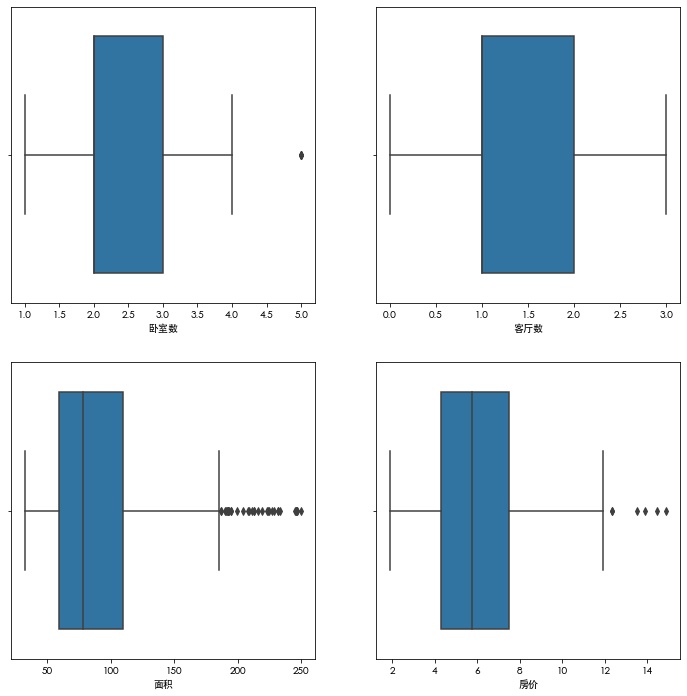

In [6]:
#异常值
##查看是否异常值
# 查看是否存在异常值
cols = data.describe().columns.to_list()
plt.figure(figsize=(12,12))
for index,col in enumerate(cols,1):
    plt.subplot(2,2,index)
    sns.boxplot(f'{col}',data=data)
plt.show()



In [7]:
# 筛选出异常值
new_data = data[(data['卧室数']<4.5) & (data['面积']<200) & (data['房价']<12)]
new_data.shape


(774, 8)

# 探索性数据分析

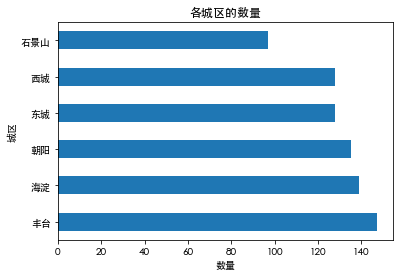

In [8]:
# 各城区的数量
new_data['城区'].value_counts().plot(kind='barh')
plt.xlabel('数量')
plt.ylabel('城区')
plt.title('各城区的数量')
plt.show()


<AxesSubplot:xlabel='城区', ylabel='房价'>

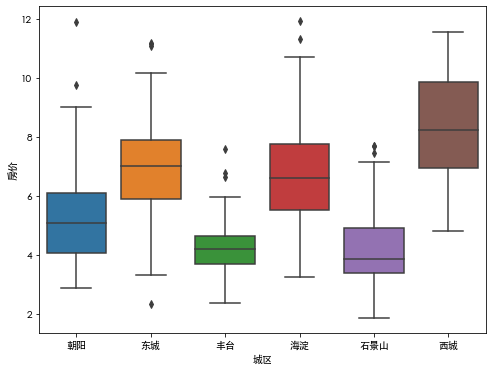

In [9]:
#城区房价情况
# 分析各城区的房价分布情况
plt.figure(figsize=(8,6))
sns.boxplot(x='城区',y='房价',data=new_data)


<AxesSubplot:xlabel='城区', ylabel='房价'>

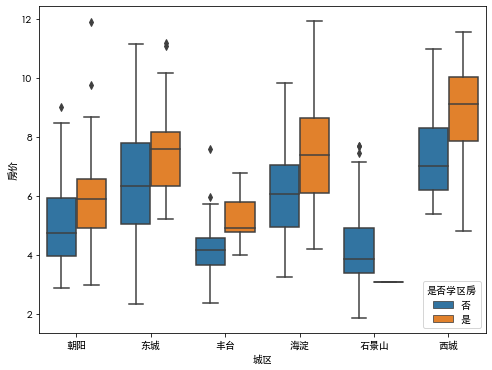

In [10]:
#学区房对房价的影响
# 分析各城区的房价分布情况
plt.figure(figsize=(8,6))
sns.boxplot(x='城区',y='房价',hue='是否学区房',data=new_data)


<AxesSubplot:xlabel='城区', ylabel='房价'>

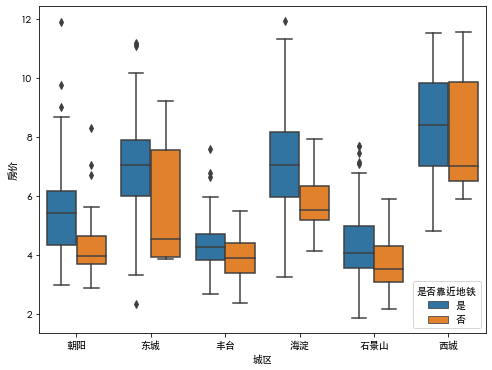

In [11]:
#地铁对房价的影响
# 分析各城区的房价分布情况
plt.figure(figsize=(8,6))
sns.boxplot(x='城区',y='房价',hue='是否靠近地铁',data=new_data)


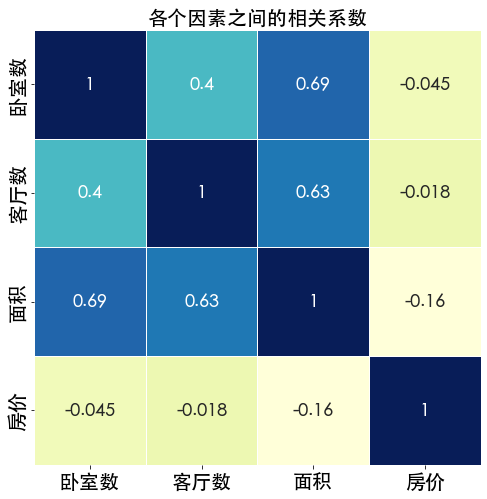

In [12]:
#各特征的相关性
fig = plt.figure(figsize=(8,8))
sns.heatmap(new_data.corr(),vmax=1,annot=True,linewidths=0.5,cbar=False,cmap='YlGnBu',annot_kws={'fontsize':18})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('各个因素之间的相关系数',fontsize=20)
plt.show()


# 特征工程

In [13]:
#首先要对字符型数据进行转换处理，为后面建模做铺垫
new_data['城区'] = new_data['城区'].map({'丰台':0,'海淀':1,'朝阳':2,'东城':3,'西城':4,'石景山':5})
new_data['楼层'] = new_data['楼层'].map({'high':0,'middle':1,'low':2})
new_data['是否靠近地铁'] = new_data['是否靠近地铁'].map({'是':1,'否':0})
new_data['是否学区房'] = new_data['是否学区房'].map({'是':1,'否':0})
new_data.head()


,城区,卧室数,客厅数,面积,楼层,是否靠近地铁,是否学区房,房价
0,2,2,1,88.57,2,1,0,3.5001
1,2,2,2,94.15,1,1,0,6.5853
2,2,1,0,38.01,1,1,1,4.8672
3,2,2,2,111.85,0,1,0,6.5266
4,2,3,2,155.30,0,1,0,5.0870


In [14]:
#我们需要对数据集进行拆分训练集和测试集！！！
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = new_data.drop('房价',axis=1)
y = new_data['房价']
# 划分数据集
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)


# 模型构建

In [15]:
#多元线性回归模型
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x_train,y_train)
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)
print('训练集mse:',mean_squared_error(y_train,y_train_pred))
print('测试集mse:',mean_squared_error(y_test,y_test_pred))


训练集mse: 2.64614705540301
测试集mse: 3.21371867772055


In [16]:
#随机森林模型
# 随机森林
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(x_train,y_train)
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
print('训练集mse:',mean_squared_error(y_train,y_train_pred))
print('测试集mse:',mean_squared_error(y_test,y_test_pred))


训练集mse: 0.31999452997861505
测试集mse: 2.5432241438088488


In [17]:
# 神经网络
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(x_train,y_train)
y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)
print('训练集mse:',mean_squared_error(y_train,y_train_pred))
print('测试集mse:',mean_squared_error(y_test,y_test_pred))


训练集mse: 2.8070602418718003
测试集mse: 3.3691891611210285


# 参数调优

In [18]:
# 利用网格搜索进行最优参数的选取
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[i*50 for i in range(1,15)],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,2,3]
}
grid_seach_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=0),param_grid=param_grid,scoring='neg_mean_squared_error',cv=5)
grid_seach_rf.fit(x_train,y_train)
print(grid_seach_rf.best_params_)


{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [19]:
# 经过参数优化后的随机森林
rfr_ = RandomForestRegressor(n_estimators=100,min_samples_leaf=3,min_samples_split=2,random_state=666)
rfr_.fit(x_train,y_train)
y_train_pred = rfr_.predict(x_train)
y_test_pred = rfr_.predict(x_test)
print('训练集mse:',mean_squared_error(y_train,y_train_pred))
print('测试集mse:',mean_squared_error(y_test,y_test_pred))


训练集mse: 0.9999774322851189
测试集mse: 2.376216826025316


1 是否学区房 0.3004324497149623
2 面积 0.2836613172463544
3 城区 0.2596248408572205
4 客厅数 0.04541412520145369
5 楼层 0.043501874918137576
6 卧室数 0.040074886828337604


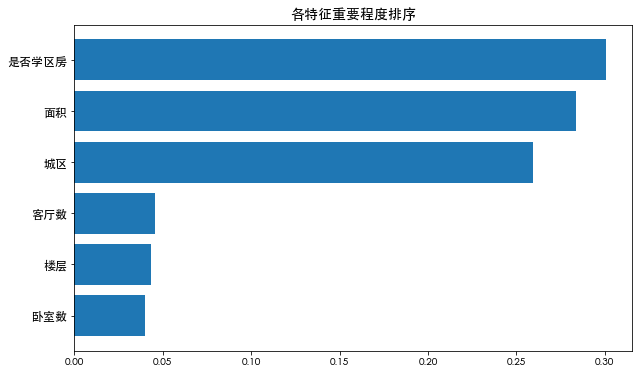

In [20]:
#打印特征重要性评分
feat_labels = x_train.columns[0:]
importances = rfr.feature_importances_
indices = np.argsort(importances)[::-1]
index_list = []
value_list = []
for f,j in zip(range(x_train.shape[1]-1),indices):
    index_list.append(feat_labels[j])
    value_list.append(importances[j])
    print(f + 1, feat_labels[j], importances[j])
plt.figure(figsize=(10,6))
plt.barh(index_list[::-1],value_list[::-1])
plt.yticks(fontsize=12)
plt.title('各特征重要程度排序',fontsize=14)
plt.show()


# 模型预测

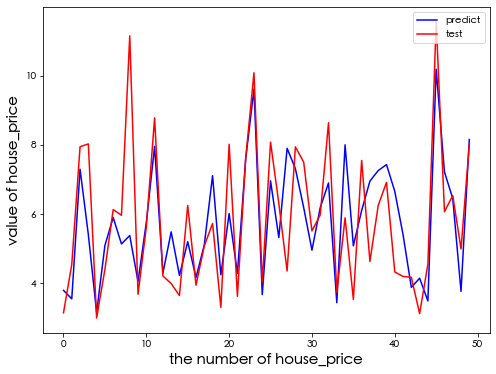

In [21]:
# 模型评价  
import matplotlib.pyplot as plt  
plt.figure(figsize=(8,6))  
plt.plot(range(len(y_test_pred))[:50],y_test_pred[:50],'b',label='predict')
plt.plot(range(len(y_test_pred))[:50],y_test[:50],'r',label='test')
plt.legend(loc='upper right')
plt.xlabel('the number of house_price',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('value of house_price',fontdict={'weight': 'normal', 'size': 15})
plt.show()
